<a href="https://colab.research.google.com/github/CGproject-record/rr_to_some_hrv/blob/main/20230911%20try%20ver1%20colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
# # 以相對路徑變更工作目錄
# os.chdir(r'C:/Users/PEK/test0822')
from function_need import *

Using TensorFlow backend.


In [ ]:
# solution
read_file = pd.read_csv('ex_rr.txt',error_bad_lines=False)
read_file

b'Skipping line 31: expected 12 fields, saw 18\nSkipping line 54: expected 12 fields, saw 18\nSkipping line 98: expected 12 fields, saw 18\nSkipping line 185: expected 12 fields, saw 18\nSkipping line 357: expected 12 fields, saw 18\n'


,Time(h:m:s),RR(ms),RV(%),n,err,mean NN(ms),SDNN(ms),TP(ms2),VLF(ms2),LF(ms2),HF(ms2),window length(s)
0,17:01:52,836.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17:01:53,806.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17:01:54,854.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17:01:55,866.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17:01:56,878.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
360,17:06:55,860.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,17:06:56,834.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,17:06:56,868.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,17:06:57,872.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
RR_data = read_file.iloc[:,1]
RR_data

0      836.0
1      806.0
2      854.0
3      866.0
4      878.0
       ...  
360    860.0
361    834.0
362    868.0
363    872.0
364    858.0
Name: RR(ms), Length: 365, dtype: float64

In [ ]:
RR_data.isna().sum()

5

In [ ]:
RR_rm_nan = RR_data.dropna()
RR_rm_nan

0      836.0
1      806.0
2      854.0
3      866.0
4      878.0
       ...  
360    860.0
361    834.0
362    868.0
363    872.0
364    858.0
Name: RR(ms), Length: 360, dtype: float64

In [ ]:
RR_rm_nan.isna().sum()

0

In [ ]:
import matplotlib.pyplot as plt

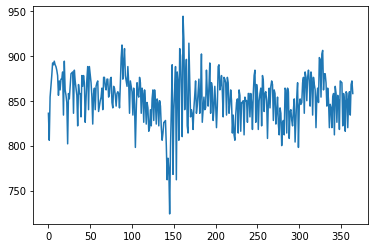

In [ ]:
plt.plot(RR_rm_nan)

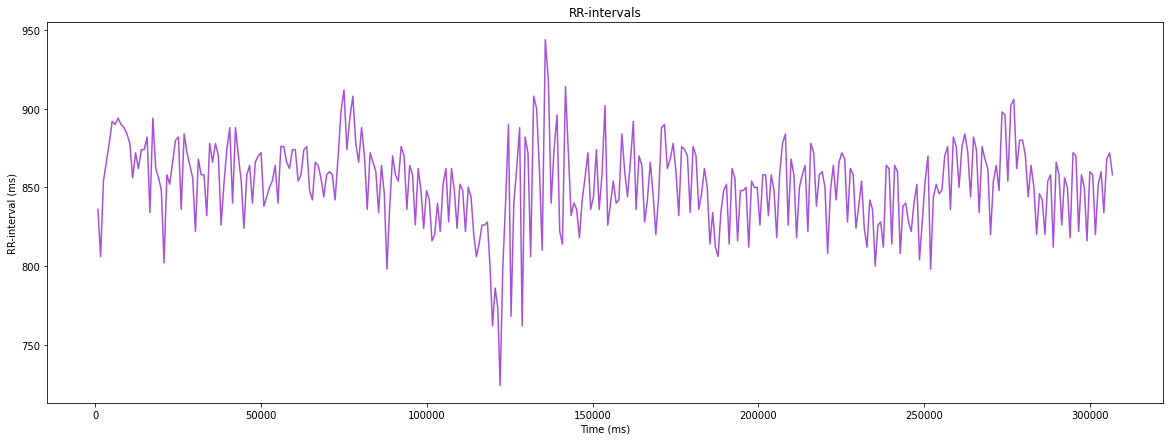

In [ ]:
plt.figure(figsize=(20, 7))
plt.title("RR-intervals")
plt.xlabel("Time (ms)")
plt.ylabel("RR-interval (ms)")

plt.plot(np.cumsum(RR_rm_nan), RR_rm_nan, label="RR-interval", color="#A651D8")
plt.show()

In [ ]:
hrv1=pd.DataFrame(['NA','NA','NA','NA','NA','NA','NA','NA'])
h0=hrv1.transpose()
h0.columns =['aFdP', 'fFdP', 'ARerr', 'DFA.Alpha.1', 'Mean.rate',
                       'Poincar..SD2', 'shannEn', 'LF.HF.ratio.LombScargle']
hrv1=hrv1.transpose()
# Define HRV input parameters
# Time Domain Settings
settings_time = {
    'threshold': 50,            # Computation of NNXX/pNNXX with 50 ms threshold -> NN50 & pNN50
    'plot': True,               # If True, plots NNI histogram
    'binsize': 7.8125           # Binsize of the NNI histogram
}

# Frequency Domain Settings
settings_welch = {
    'nfft': 2 ** 12,            # Number of points computed for the FFT result
    'detrend': True,            # If True, detrend NNI series by subtracting the mean NNI
    'window': 'hanning'         # Window function used for PSD estimation
}

settings_lomb = {
    'nfft': 2**8,               # Number of points computed for the Lomb PSD
    'ma_size': 5                # Moving average window size
}

settings_ar = {
    'nfft': 2**12,              # Number of points computed for the AR PSD
    'order': 32                 # AR order
}

# Nonlinear Parameter Settings
settings_nonlinear = {
    'short': [4, 16],           # Interval limits of the short term fluctuations
    'long': [17, 64],           # Interval limits of the long term fluctuations
    'dim': 2,                   # Sample entropy embedding dimension
    'tolerance': None           # Tolerance distance for which the vectors to be considered equal (None sets default values)
}
fs = 125

In [ ]:
import warnings

In [ ]:
hrv_part1 = hrvtransform_filter_rr(RR_rm_nan,fs,hrv1,settings_time,settings_welch,settings_ar,settings_lomb,settings_nonlinear)

c:\users\pek\appdata\local\programs\python\python36\lib\site-packages\pyhrv\time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '
c:\users\pek\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))
c:\users\pek\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\pek\appdata\local\programs\python\p

In [ ]:
hrv_part1

,aFdP,fFdP,ARerr,DFA.Alpha.1,Mean.rate,Poincar..SD2,shannEn,LF.HF.ratio.LombScargle
1,-0.999404,-0.999156,0.029569,0.725628,70.481016,0.030566,5.519882,0.454077


In [ ]:
#generate HRV from hrvanalysis

In [ ]:
from hrvanalysis import get_time_domain_features,get_geometrical_features,get_frequency_domain_features,get_csi_cvi_features,get_poincare_plot_features,get_sampen
nn_intervals_list = RR_rm_nan


In [ ]:
time_domain_features = get_time_domain_features(nn_intervals_list)
time_domain_features

{'mean_nni': 852.1555555555556,
 'sdnn': 26.8614151460032,
 'sdsd': 31.873822084766097,
 'nni_50': 22,
 'pnni_50': 6.128133704735376,
 'nni_20': 183,
 'pnni_20': 50.97493036211699,
 'rmssd': 31.873880995159553,
 'median_nni': 856.0,
 'range_nni': 220.0,
 'cvsd': 0.03740382936819516,
 'cvnni': 0.03152172742509568,
 'mean_hr': 70.4810163798876,
 'max_hr': 82.87292817679558,
 'min_hr': 63.559322033898304,
 'std_hr': 2.270499353642716}

In [ ]:
len(time_domain_features)

16

In [ ]:
get_geometrical_features(nn_intervals_list)

{'triangular_index': 7.2, 'tinn': None}

In [ ]:
get_frequency_domain_features(nn_intervals_list)

{'lf': 114.47680799375303,
 'hf': 198.44872605254412,
 'lf_hf_ratio': 0.5768583667473003,
 'lfnu': 36.58276348161996,
 'hfnu': 63.41723651838005,
 'total_power': 451.5078216490898,
 'vlf': 138.5822876027927}

In [ ]:
get_csi_cvi_features(nn_intervals_list)

{'csi': 1.3538627893038861,
 'cvi': 4.042744349095494,
 'Modified_csi': 165.47567159707936}

In [ ]:
get_poincare_plot_features(nn_intervals_list)

{'sd1': 22.569651714335414,
 'sd2': 30.55621162358738,
 'ratio_sd2_sd1': 1.3538627893038861}

In [ ]:
get_sampen(nn_intervals_list)

{'sampen': 1.7764919970972666}